In [18]:
import os
import sys
sys.path.append("./..")
from utils import PROJECT_ROOT
from definitions import get_cell_phenotype_id
import numpy as np
from SoftWL import compute_cluster_centroids, merge_close_clusters
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
import pickle

In [19]:
iteration = 2
PhenoGraph_k =  100

In [20]:
SoftWL_dict= pickle.load(
    open(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel",
            "Danenberg",
            "Cohort_1",
            "SoftWL_dict_iter_"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraph_k)
            + ".pkl",
        ),
        "rb",
    ),
)
Patient_IDs = SoftWL_dict["Patient_id"]
Gram_matrix = SoftWL_dict["Gram_matrix"]
Histograms = SoftWL_dict["Histogram"]


Text(0.5, 1.0, 'Gram matrix (iter = 2, k = 100)')

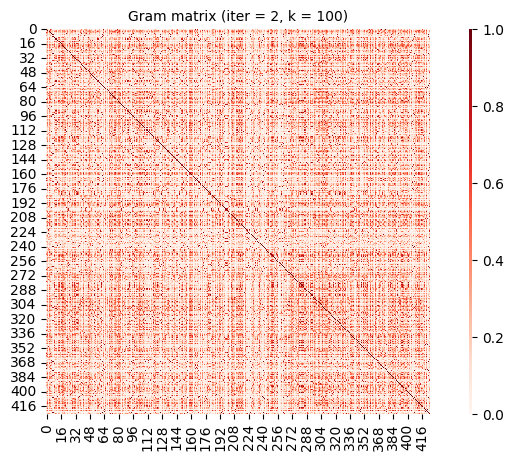

In [21]:
f, (ax, cbar_ax) = plt.subplots(1,2,figsize=(5.5, 5),gridspec_kw= {"width_ratios": [20,0.2]} )
sns.heatmap(
        Gram_matrix,
        ax=ax,
        cbar_ax=cbar_ax,
        cmap="Reds",
        linewidth=0.0005,
        edgecolor="black",
    )
ax.set_title(f"Gram matrix (iter = {iteration}, k = {PhenoGraph_k})", fontsize=10)

Text(0.5, 1.0, 'Histograms by patient (iter = 2, k = 100)')

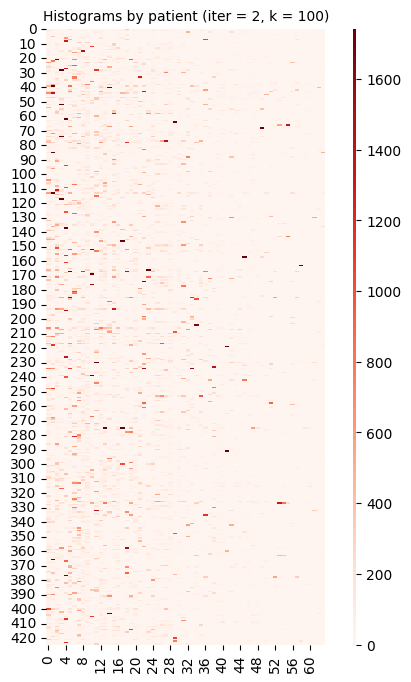

In [24]:
f, (ax, cbar_ax) = plt.subplots(1,2,figsize=(4, 8),gridspec_kw= {"width_ratios": [20,0.2]} )
sns.heatmap(
        Histograms,
        ax=ax,
        cbar_ax=cbar_ax,
        cmap="Reds",
        linewidth=0.0005,
        edgecolor="black",
        vmin = 0,
        vmax = np.percentile(Histograms, 99.9)
    )
ax.set_title(f"Histograms by patient (iter = {iteration}, k = {PhenoGraph_k})", fontsize=10)